# Het Rescorla-Wagner model

De Rescorla-Wagner theorie illustreert hoe simpele leermethoden gevoelig kunnen zijn voor de koppeling tussen de geconditioneerde stimulus (CS) en de ongeconditioneerde stimulus (US). In het geval van Pavlov wordt er een associatie geleerd tussen een belletje en het vlees dat de hond voorgeschoteld krijgt.



In reactie hierop produceert de hond speeksel. Het effect van de geconditioneerde stimulus (het belletje) wordt groter als er vaker een koppeling wordt gepresenteerd met een ongeconditioneerde stimulus (de steak): hoe vaker de associatie aangeboden wordt, hoe groter de respons, ofwel hoe groter de associatieve sterkte (V in het Rescorla-Wagner model).

Met het Rescorla-Wagner model kun je sterktes van associaties kwantificeren en dat is de kern van deze opdrachten. Details over het Rescorla-Wagner model en extinctie, compound stimuli en blocking in *Learning & Memory*, en in de college slides.

![](RWCurve.png)

**Let op!** Hieronder volgen een aantal opdrachten over de R-W theorie. Bij elke vraag staat de hoeveelheid punten die je er voor kan krijgen. Geef de antwoorden in blocken met code of text. Gebruik voor antwoorden in text de ">" voor blockquotes. **Geef bij elke vraag ook kort uitleg als hier om wordt gevraagd**. Sla het uiteindelijke notebook op, met jouw studentnummer en achternaam in de filenaam: `studentnummer_achternaam_opdrachtnummer` 

> dit is een voobeeld antwoord met `code`

---

## Verandering associatieve sterkte

Stel dat de CS en de US 10 keer worden gepresenteerd. De maximale sterkte die de associatie tussen de CS en US kan hebben is 100 en de leersnelheid $\alpha$ is 0.4. De sterkte van de associatie voordat de CS en US de eerste keer worden gepresenteerd is 0.

Om het simpel te houden gaan we in de opdrachten uit van de een simperl RW model met maar een learning rate:

$$ V_{t+1} = V_t + \Delta V_t $$
$$ \Delta V_t = \alpha(V_{max} - V_t) $$

### Q1.a (6 punten)

Wat is de waarde van $\Delta V$ na de eerste leer-’trial’? Wat is dan de waarde van $V$ ?

> $\Delta V_1 = 0.4(100-0) = 40$

> $ V_2 = 0 + 40 = 40$

### Q1.b (6 punten)

Schrijf een functie die $\Delta V$ uitrekent. Welke argumenten, of informatie, heeft deze functie nodig om $\Delta V$ te kunnen uitrekenen? Noem deze functiie `rescorla_wagner()`.

Breid de functie uit zodat deze ook de waarde van ($V$) en $\Delta V$ kan uitrekenen en bijhouden voor meerdere leertrials. Ga er van uit dat er in het begin nog geen enkele associatie is ($V$=0).

Om je op weg te helpen:
```python
def rescorla_wagner(alpha, v_start, v_max, trials):
    v_list = [] # empty list for Vs
    delta_list = [] # empty list for ∆Vs
    
    for i in range(trials):
        v_list.append(v_start)
        v_delta = alpha*(v_max - v_start)
        delta_list.append(v_delta)
        v_start = v_start + v_delta

    return (v_list, delta_list)

```

### Q1.c (6 punten)

Gberuik de functie om het leren van een associatie in 10 trials te simuleren. Gebruik hiervoor dan een learning rate van 0.4 ($\alpha$) , een start associatie van 0 ($V$), en een $V_{max}$ van 100. Wat zijn de berekende waardes voor $V$ en $\Delta V$ na 10 trials?



In [1]:
def rescorla_wagner(alpha, v_start, v_max, trials):
    v_list = [] # empty list for Vs
    delta_list = [] # empty list for ∆Vs
    
    for i in range(trials):
        v_list.append(v_start)
        v_delta = alpha*(v_max - v_start)
        delta_list.append(v_delta)
        v_start = v_start + v_delta

    return (v_list, delta_list)


results_alpha_04 = rescorla_wagner(0.4, 0, 100, 10)

print(f"V na 10 trials = {results_alpha_04[0][-1]}")
print(f"V_delta na 10 trials = {results_alpha_04[1][-1]}")

V na 10 trials = 98.9922304
V_delta na 10 trials = 0.40310784000000127


> V na 10 trials = 98.9922304

> V_delta na 10 trials = 0.40310784000000127

### Q1.d (6 punten)
We gaan nu een aantal grafieken maken om het gedrag van het model nog beter te begrijpen. Om je op weg te helpen is hier een functie om de grafieken mooi weer te geven:
``` python
%matplotlib inline
import matplotlib.pyplot as plt

def plot_trials(y_label, line_labels, *results_list):
    trials = range(1, len(results_list[0])+1)
    plt.xlabel(r"$t$")
    plt.ylabel(y_label)
    #plt.hlines(95, 0, 10, colors='red')
    
    for result in results_list:
        plt.plot(trials, result)
    
    plt.legend(line_labels)
    plt.show()

```
De eerste twee argumenten gebruik je om de data en assen te labelen. Bijvoorbeeld kan je `y_label = r"$V$"` gebruiken om aan te geven dat het om $V$ gaat. 

Plot nu de grafiek van de hele leercurve. Op de x-as komen de trials te staan en op de y-as de waardes van $V$. Na hoeveel trials is de associatieve sterkte op 95% van de maximale associatieve sterkte? (uncomment plt.hlines()) om een horizontale lijn aan de grafiek toe te voegen).



In [5]:
import matplotlib.pyplot as plt

def plot_trials(y_label, line_labels, *results_list):
    trials = range(1, len(results_list[0])+1)
    plt.xlabel(r"$t$")
    plt.ylabel(y_label)
#     plt.hlines(95, 0, 10, colors='red')
    
    for result in results_list:
        plt.plot(trials, result)
    
    plt.legend(line_labels)
    plt.show()

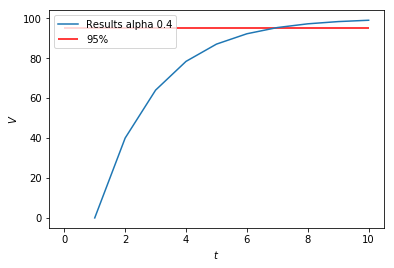

In [4]:
plot_trials(r"$V$", ["Results alpha 0.4", "95%", ], results_alpha_04[0])

> Na 7 trials is de associatieve sterkte op 95% van de maximale associatieve sterkte.

### Q1.e (6 punten)

Bereken nu ook de waardes van $V$ voor een andere waarde van $\alpha$. Maak een plot met de twee leercurves voor twee verschillende waardes van $\alpha$ (0.1 en 0.6). Wat is het effect van een hogere of lagere $\alpha$?

Plot in een aparte grafiek ook de $\Delta V$'s, hoe verschillen die voor de verschillende $\alpha$'s ?

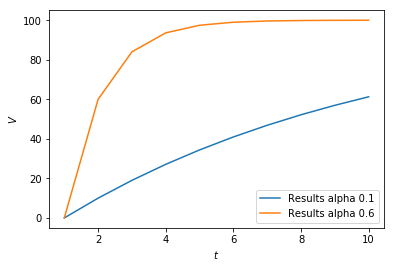

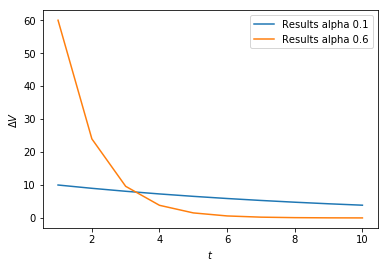

In [6]:
results_alpha_01 = rescorla_wagner(0.1, 0, 100, 10)
results_alpha_06 = rescorla_wagner(0.6, 0, 100, 10)

plot_trials(r"$V$", ["Results alpha 0.1", "Results alpha 0.6"], results_alpha_01[0], results_alpha_06[0])
plot_trials(r"$\Delta V$", ["Results alpha 0.1", "Results alpha 0.6"], results_alpha_01[1], results_alpha_06[1])

> Een hogere $ \alpha $ zorgt voor een snellere toenamen van de associatieve sterkte.

> Een hogere $ \alpha $ zorgt voor een hogere startwaarde en een snellere daling van het verschil van de associatieve sterkte.

## Extinctie curve

In deze opdracht ga je een extinctie curve plotten. Volg de stappen hieronder om de juiste waardes van $V$ te kunnen uitrekenen. In geval van extinctie begint de hond met al een sterke associatie tussen bel en beloning ($V_t=0 > 0$), maar deze associatie wordt verbroken. Gebruik dus voor $V$ de laatste waarde van de vorige oprdacht ($V_{t=0} \approx 100$). Wat er nu gaat gebeuren is dus dat de bel rinkelt maar de hond niks krijgt (maar eerst wel verwacht).

### Q2.a (6 punten)

Wat is de maximale associatie waarde $V_{max}$ bij extinctie trials?

> De maximale associatie waarde $V_{max}$ bij extinctie trials is 0


### Q2.b (6 punten)

Bereken nu de waarde van $V$ na de eerste extinctie trial met behulp van de R-W formule (en de functie die je hiervoor geschreven hebt in Opdracht 1; gebruik voor de waarde van $\alpha$ = 0.4). Wat is deze waarde $V_{t=1}$?

In [7]:
rescorla_wagner(0.4, results_alpha_04[0][-1], 0, 1)

([98.9922304], [-39.59689216])

### Q2.c (6 punten)

Bereken nu de waardes van V voor een aantal extinctie trials en plot deze in een grafiek. Na hoeveel extinctie trials is de associatieve sterkte $V$ minder dan 1% van de associatieve sterkte waar je mee begon? Plot ook de absolute waarde van $\Delta V$, wat gebeurd daar mee?

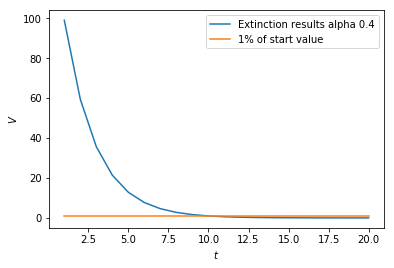

In [8]:
ext_results_alpha_04 = rescorla_wagner(0.4, results_alpha_04[0][-1], 0, 20)

plot_trials(r"$V$", ["Extinction results alpha 0.4", "1% of start value"], ext_results_alpha_04[0], [ext_results_alpha_04[0][0]*0.01]*len(ext_results_alpha_04[0]))

---

## Compound stimuli

In deze opdracht gaan we kijken naar het Rescorla-Wagner model voor compound stimuli. Bij compound stimuli bestaat de CS niet uit 1 stimulus maar uit een samenstelling van meerdere stimuli, bijvoorbeeld A (belletje) en B (lampje). Hierbij wordt de maximale associatieve waarde ($V_{max}$) van de US verdeeld over de stimuli A en B. Neem hierbij verder aan dat stimulus A een grotere leersnelheid ($\alpha = 0.4$) heeft dan stimulus B ($\alpha = 0.1$) omdat het belletje indringender is dan het lampje. Neem aan dat $V_{max}$ weer 100 is, en $V_{t=0}=0$. 


### Q3.a (6 punten)
Maak een grafiek van de associatieve sterktes van A en B en van de compound van A en B (drie lijnen dus). **Let op!** Als het goed is kan $V_A+V_B$ nooit meer zijn dan $V_{max}$. Plot dit voor 20 trials. 



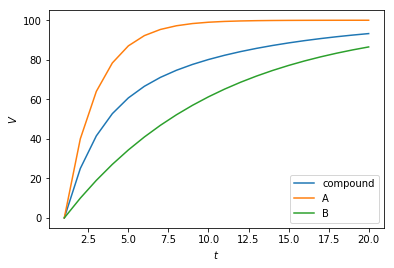

In [54]:
def compound_rescorla_wagner(alpha, beta, v_start, v_max, trials):
    A_temp = rescorla_wagner(alpha, v_start/2, v_max/2, trials)
    B_temp = rescorla_wagner(beta, v_start/2, v_max/2, trials)
    return [[a + b for a, b in zip(A_temp[i], B_temp[i])] for i in range(len(A_temp))]

A = rescorla_wagner(0.4, 0, 100, 20)
B = rescorla_wagner(0.1, 0, 100, 20)
compound = compound_rescorla_wagner(0.4, 0.1, 0, 100, 20)

plot_trials(r"$V$", ["compound", "A", "B"], compound[0], A[0], B[0])

### Q3.b (6 punten)

Bij het begin van trial 1 zijn alle associatie sterktes 0, ie van A, van B, en van de combinatie van A en B. Wat zijn de associatie sterktes van A, B, en van de combinatie van A en B na de eerste trial? En wat zijn de waardes na 20 trials?


In [67]:
print(f"associatieve sterkte na eerste trial: A = {A[0][1]}, B = {B[0][1]}, Compound = {compound[0][1]}")
print(f"associatieve sterkte na 20 trials: A = {A[0][-1]}, B = {B[0][-1]}, Compound = {compound[0][-1]}")

associatieve sterkte na eerste trial: A = 40.0, B = 10.0, Compound = 25.0
associatieve sterkte na 20 trials: A = 99.9939064025999, B = 86.49148282327009, Compound = 93.242694612935


>associatieve sterkte na eerste trial: A = 40.0, B = 10.0, Compound = 25.0

>associatieve sterkte na 20 trials: A = 99.9939064025999, B = 86.49148282327009, Compound = 93.242694612935

## Blocking


Ook een blocking experiment gebruikt verschillende stimuli, en bestaat uit twee fases. Ga er nu van uit dat er nu weer een belletje en een lampje zijn, en dat stimulus B, het lampje, de geblockde stimulus is (zet dit keer voor beiden stimuli $\alpha = 0.2$). Bij een blocking experiment zal in de eerste fase alleen stimulus A worden aangeboden en daarna na een tijd beiden stimuli tegelijk:

fase 1:  CS_A -> US (20 trials)

fase 2: (CS_A + CS_B) -> US (20 trials)

### Q4.a (6 punten)

Bij het begin van trial 1 zijn alle associatie sterktes 0 (ie van A *en* B). Wat zijn de associatie sterktes van A, B na de eerste trial? En na de tweede trial?**let op!** je kan hier gebruik maken van de functie die je voor opdracht 3 over compound stimuli hebt geschreven. 




In [68]:
fase1 = rescorla_wagner(0.2, 0, 100, 20)
fase2 = compound_rescorla_wagner(0.2, 0.2, fase1[0][19], 100, 20)
totale_fase = [fase1[i] + fase2[i] for i in range(len(fase1))]

print(f"associatieve sterkte na eerste trial: A = {fase1[0][1]}, B = 0")
print(f"associatieve sterkte na tweede trial: A = {fase1[0][2]}, B = 0")

associatieve sterkte na eerste trial: A = 20.0, B = 0
associatieve sterkte na tweede trial: A = 36.0, B = 0


> associatieve sterkte na eerste trial: A = 20.0, B = 0

> associatieve sterkte na tweede trial: A = 36.0, B = 0

### Q4.b (6 punten)

Bereken nu de associatieve sterktes voor A en B voor een 20 trials in fase 1, en dan 20 trials in fase 2. Maak een grafiek van de associatieve sterktes van A en B voor deze 40 trials. Wat gebeurd er met de associate sterkte van stimulus B ($V_B$), ofwel wat gebeurd er als er na die 40 trials alleen een lampje aangaat zonder bel?


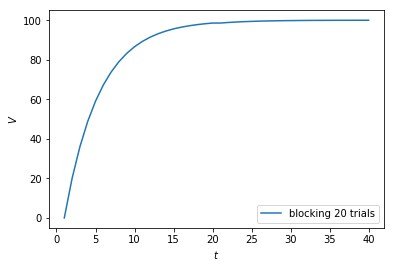

In [69]:
plot_trials(r"$V$", ["blocking 20 trials"], totale_fase[0])

> Als na de 40 trials alleen B aan gaat, dan is er geen associatie door blocking. Door de 20 trials met alleen A is er al een bijna maximale associatieve waarde waardoor als B er bij komt B hierdoor wordt geblokkeerd.

### Q4.c (6 punten)

Wat gebeurd er als de eerste fase wordt ingekort tot 5 trials? Laat zien met een plot en leg uit. 

24


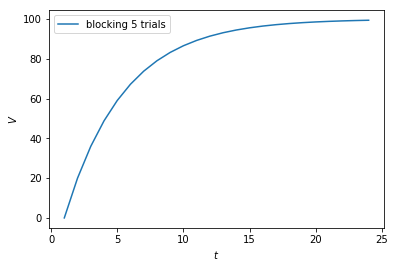

In [85]:
fase1_2 = rescorla_wagner(0.2, 0, 100, 5)
fase2_2 = compound_rescorla_wagner(0.2, 0.2, fase1_2[0][4], 100, 20)
totale_fase_2 = [fase1_2[i] + fase2_2[i][1:] for i in range(len(fase2_2))]
print(len(totale_fase_2[0]))

plot_trials(r"$V$", ["blocking 5 trials"], totale_fase_2[0])

## 5 Latent inhibition

In het volgende experiment zijn er twee honden. De eerste hond, Scnhauzie, wordt in een hok gehouden waar gewoon af en toe, zomaar zonder goede reden, een belletje af gaat (CS). Als het belletje gaat gebeurd er verder dus niks. De tweede hond, Bello, wordt in een hok gehouden waar helemaal nooit iets te horen valt.

Vervolgens doen beiden honden mee aan het experiment van Pavlov waarbij een belletje (CS) aan een een beloning (US) worden gekoppelt.

### Q5.a (6 punten)

Simuleer de data voor beiden honden en plot deze learning curves samen in een grafiek($\alpha = 0.4$). Gebruik 10 pre-trials voor de pre-exposure van Schnauzie ($V_{max}=0$), en dan 10 leer trials voor beiden honden (nu wel een beloning dus $V_{max}$ weer 100).


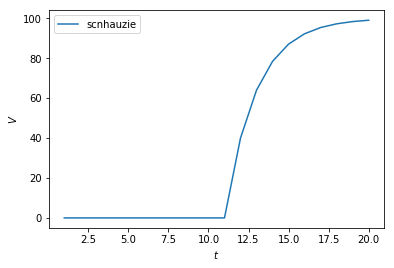

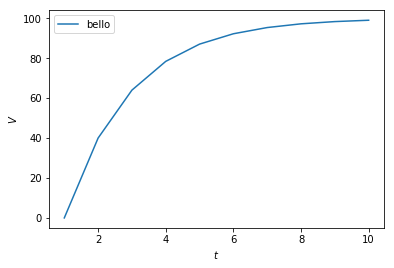

In [91]:
pre_trials = rescorla_wagner(0.4, 0, 0, 10)
scn_trials = rescorla_wagner(0.4, 0, 100, 10)
scnhauzie = [pre_trials[i] + scn_trials[i] for i in range(len(pre_trials))]
bello = rescorla_wagner(0.4, 0, 100, 10)

plot_trials(r"$V$", ["scnhauzie"], scnhauzie[0])
plot_trials(r"$V$", ["bello"], bello[0])

### Q5.b (6 punten)

Hoe zien de leercurves er uit? Hoe verschild dit van de data in figure 4.16 in het boek, en wat is daar een mogelijke verklaring voor? Hoe zou je het RW model kunnen aanpassen om dit te ondervangen? Laat zien in een plotje of jou methode heeft gewerkt. 

> De leercurves zijn hetzelfde, in 4.16 lijkt het alsof scnhauzie slomer zou moeten leren, dit komt waarschijnlijk doordat je een soort van negatieve associatie zou moeten krijgen door de pre-trials. Dit zou kunnen opgelost worden door of de learning rate omlaag te doen of een negatieve associatie toe te laten.

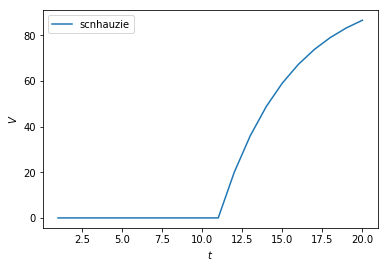

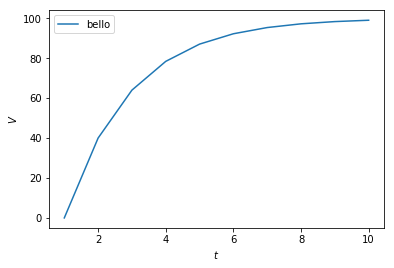

In [92]:
pre_trials = rescorla_wagner(0.4, 0, 0, 10)
scn_trials = rescorla_wagner(0.2, 0, 100, 10) # Hier is de learning rate rehalveerd.
scnhauzie = [pre_trials[i] + scn_trials[i] for i in range(len(pre_trials))]
bello = rescorla_wagner(0.4, 0, 100, 10)

plot_trials(r"$V$", ["scnhauzie"], scnhauzie[0])
plot_trials(r"$V$", ["bello"], bello[0])